In [1]:
ls

Meetup_NFLlines_Sep2014.pdf   nfl-season-standings.ipynb
__pycache__/                  nfl-survival-pool-test.ipynb
backtest_vs_elo_538.ipynb     nfl.ipynb
cuny2015_nfl_ml.pptx          nfl_alain.ipynb
external_data.py              nfl_alain_2015.ipynb
get-data-2016.ipynb           nfl_picks2.py
merge elo .ipynb              nflmerge.ipynb
mlnfl-nfl-graphlab.ipynb      nohup.out
mlnfl-nfl.ipynb               pydata2014_nfl_ml.pptx
mlnfl-nfl2.ipynb              readme.md
mlnfl-nfl2015-webinar.ipynb   run_nfl_picks.ipynb
mlnfl-nfl2015.ipynb           scrape-scores.ipynb
mlnfl-nfl2016-demo.ipynb      scrape-spreads.ipynb
mlnfl-nfl2018-demo.ipynb      spread to probability.ipynb
mlnfl-pydata.ipynb            webapp/
nfl/


In [2]:
import numpy as np
from nfl import madden
from nfl.referencedata import ReferenceData
import pandas
import logging
import os
%matplotlib inline


In [3]:

dataRoot = "/Users/amitbhattacharyya/repos/mlnfl/nfl/data/"

In [4]:
lookupFiles = {'teams' : {'file': 'nflTeams.csv'}, 'seasons': {'file': 'seasons.csv'}, }

lookupDir = "".join([dataRoot, 'lookup', os.path.sep])

logging.info("lookupFiles = %s" % lookupFiles)
logging.info("lookupDir = %s" % lookupDir)

# load reference data
reference_data = ReferenceData(lookupDir)


 2018-12-22 14:46:28,055 - INFO - lookupFiles = {'teams': {'file': 'nflTeams.csv'}, 'seasons': {'file': 'seasons.csv'}}
 2018-12-22 14:46:28,056 - INFO - lookupDir = /Users/amitbhattacharyya/repos/mlnfl/nfl/data/lookup/


In [5]:
season = 2018
if 1:
    # train on previous 3 yrs of data
    testYear = [season]
    trainYears = range(season-10,season)

    # training data set - includes one extra year for prev yr record
    seasons = np.array(trainYears)
 
    # get training data
    # 1 - read all the games
    path_to_lines = dataRoot + "lines/"
    df_all_historical_games = madden.readGamesAll(path_to_lines, seasons)
    # 2 - compile season record for all teams
    df_all_teams = madden.seasonRecord(df_all_historical_games, reference_data)
    # 3 - apply season records and compute other fields for all games
    df_all_historical_games = madden.processGames(df_all_historical_games, df_all_teams, reference_data)
    # 4 - remove extra year of data
    df_all_historical_games = df_all_historical_games[df_all_historical_games.season.isin(seasons)]

 

/Users/amitbhattacharyya/repos/mlnfl/nfl/madden.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  team_df['gamesPlayed'] = range(1, len(team_df.index) + 1)  # index 1 thur 16
/Users/amitbhattacharyya/repos/mlnfl/nfl/madden.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  team_df['team'] = team
/Users/amitbhattacharyya/repos/mlnfl/nfl/madden.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [6]:
df_all_historical_games.columns

Index(['Date', 'Visitor', 'Visitor Score', 'Home Team', 'Home Score', 'Line',
       'Total Line', 'season', 'week', 'favorite', 'underdog',
       'favoredHomeGame', 'divisionGame', 'homeWin', 'favoredWin', 'gameWeek',
       'homeRecord', 'visitorRecord', 'favoredRecord', 'underdogRecord',
       'prevFavoredRecord', 'prevUnderdogRecord', 'absLine'],
      dtype='object')

In [7]:
seaosn_filter = df_all_historical_games.season >= 2015
df_lines_performance = df_all_historical_games[seaosn_filter].pivot_table(index='Line', values="homeWin", aggfunc=(len,sum))
df_lines_performance['pct'] = df_lines_performance['sum'] / df_lines_performance['len'] * 1.
df_lines_performance

,len,sum,pct
Line,,,
-13.0,1,0,0.000000
-11.0,1,1,1.000000
-10.5,5,2,0.400000
-10.0,2,1,0.500000
-9.5,6,0,0.000000
-9.0,4,0,0.000000
-8.5,3,0,0.000000
-8.0,2,0,0.000000
-7.5,9,2,0.222222


In [8]:
#df_lines_performance.drop([0], inplace=True)
df_lines_performance['pct_smooth'] = pandas.rolling_mean(df_lines_performance['pct'], 10 , center=True)
df_lines_performance['pct_smooth2'] = pandas.rolling_mean(df_lines_performance['pct_smooth'], 6 , center=True)
df_lines_performance['pct_smooth2_inv'] = 1 -  df_lines_performance['pct_smooth2']

/Users/amitbhattacharyya/.virtualenvs/datascience3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=True).mean()
  
/Users/amitbhattacharyya/.virtualenvs/datascience3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=True).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
df_lines_performance['abs_line'] = abs(df_lines_performance.index)
df_lines_performance['line'] = df_lines_performance.index
df_lines_performance['pct_smooth_avg'] = (df_lines_performance['pct_smooth2'] + df_lines_performance['pct_smooth2_inv'] ) / 2
df_lines_performance

,len,sum,pct,pct_smooth,pct_smooth2,pct_smooth2_inv,abs_line,line,pct_smooth_avg
Line,,,,,,,,,
-13.0,1,0,0.000000,NaN,NaN,NaN,13.0,-13.0,NaN
-11.0,1,1,1.000000,NaN,NaN,NaN,11.0,-11.0,NaN
-10.5,5,2,0.400000,NaN,NaN,NaN,10.5,-10.5,NaN
-10.0,2,1,0.500000,NaN,NaN,NaN,10.0,-10.0,NaN
-9.5,6,0,0.000000,NaN,NaN,NaN,9.5,-9.5,NaN
-9.0,4,0,0.000000,0.237222,NaN,NaN,9.0,-9.0,NaN
-8.5,3,0,0.000000,0.251508,NaN,NaN,8.5,-8.5,NaN
-8.0,2,0,0.000000,0.189008,NaN,NaN,8.0,-8.0,NaN
-7.5,9,2,0.222222,0.174008,0.194405,0.805595,7.5,-7.5,0.5


In [10]:

dataRoot

'/Users/amitbhattacharyya/repos/mlnfl/nfl/data/'

In [11]:
save_loc = dataRoot + "/lookup/speead_to_probability.csv"
df_lines_performance.to_csv(save_loc, index=False)

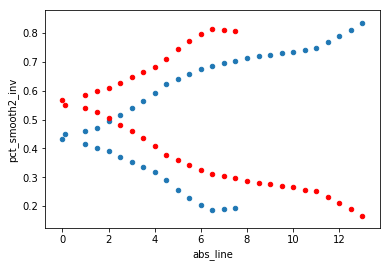

In [12]:
ax= df_lines_performance.plot(x='abs_line', y='pct_smooth2', kind='scatter')
df_lines_performance.plot(x='abs_line', y='pct_smooth2_inv', kind='scatter', ax=ax, color='r')

In [13]:
# map actual spreads to probabilities
df_lines_performance

,len,sum,pct,pct_smooth,pct_smooth2,pct_smooth2_inv,abs_line,line,pct_smooth_avg
Line,,,,,,,,,
-13.0,1,0,0.000000,NaN,NaN,NaN,13.0,-13.0,NaN
-11.0,1,1,1.000000,NaN,NaN,NaN,11.0,-11.0,NaN
-10.5,5,2,0.400000,NaN,NaN,NaN,10.5,-10.5,NaN
-10.0,2,1,0.500000,NaN,NaN,NaN,10.0,-10.0,NaN
-9.5,6,0,0.000000,NaN,NaN,NaN,9.5,-9.5,NaN
-9.0,4,0,0.000000,0.237222,NaN,NaN,9.0,-9.0,NaN
-8.5,3,0,0.000000,0.251508,NaN,NaN,8.5,-8.5,NaN
-8.0,2,0,0.000000,0.189008,NaN,NaN,8.0,-8.0,NaN
-7.5,9,2,0.222222,0.174008,0.194405,0.805595,7.5,-7.5,0.5


In [14]:
path_to_lines = dataRoot + "lines/"
df_recent = madden.readGamesAll(path_to_lines, np.array([2018]))
df_recent

,Date,Visitor,Visitor Score,Home Team,Home Score,Line,Total Line,season,week
9198,2017-09-07,Kansas City Chiefs,42.0,New England Patriots,27.0,9.0,NaN,2017,1.0
9199,2017-09-10,New York Jets,12.0,Buffalo Bills,21.0,9.5,NaN,2017,1.0
9200,2017-09-10,Atlanta Falcons,23.0,Chicago Bears,17.0,-7.0,NaN,2017,1.0
9201,2017-09-10,Baltimore Ravens,20.0,Cincinnati Bengals,0.0,3.0,NaN,2017,1.0
9202,2017-09-10,Pittsburgh Steelers,21.0,Cleveland Browns,18.0,-9.0,NaN,2017,1.0
9203,2017-09-10,Arizona Cardinals,23.0,Detroit Lions,35.0,-1.5,NaN,2017,1.0
9204,2017-09-10,Jacksonville Jaguars,29.0,Houston Texans,7.0,5.5,NaN,2017,1.0
9205,2017-09-10,Oakland Raiders,26.0,Tennessee Titans,16.0,2.5,NaN,2017,1.0
9206,2017-09-10,Philadelphia Eagles,30.0,Washington Redskins,17.0,-1.0,NaN,2017,1.0
9207,2017-09-10,Indianapolis Colts,9.0,Los Angeles Rams,46.0,3.5,NaN,2017,1.0


In [15]:
week_filter = (df_recent.week == 16) & (df_recent.season == 2018)

df_picks = df_recent[week_filter].merge(df_lines_performance, left_on="Line", right_index=True)
df_picks

,Date,Visitor,Visitor Score,Home Team,Home Score,Line,Total Line,season,week,len,sum,pct,pct_smooth,pct_smooth2,pct_smooth2_inv,abs_line,line,pct_smooth_avg
9678,2018-12-23,Atlanta Falcons,NaN,Carolina Panthers,NaN,-3.5,NaN,2018,16.0,24,8,0.333333,0.371093,0.335944,0.664056,3.5,-3.5,0.5
9679,2018-12-23,Cincinnati Bengals,NaN,Cleveland Browns,NaN,8.5,NaN,2018,16.0,4,2,0.500000,0.731589,0.720236,0.279764,8.5,8.5,0.5
9680,2018-12-23,New York Giants,NaN,Indianapolis Colts,NaN,9.0,NaN,2018,16.0,15,12,0.800000,0.762024,0.722376,0.277624,9.0,9.0,0.5
9681,2018-12-23,Tampa Bay Buccaneers,NaN,Dallas Cowboys,NaN,7.0,NaN,2018,16.0,39,29,0.743590,0.711488,0.696025,0.303975,7.0,7.0,0.5
9682,2018-12-23,Minnesota Vikings,NaN,Detroit Lions,NaN,-6.0,NaN,2018,16.0,16,6,0.375000,0.207341,0.203175,0.796825,6.0,-6.0,0.5
9683,2018-12-23,Jacksonville Jaguars,NaN,Miami Dolphins,NaN,4.0,NaN,2018,16.0,25,13,0.520000,0.600450,0.592671,0.407329,4.0,4.0,0.5
9689,2018-12-23,Baltimore Ravens,NaN,Los Angeles Chargers,NaN,4.0,NaN,2018,16.0,25,13,0.520000,0.600450,0.592671,0.407329,4.0,4.0,0.5
9684,2018-12-23,Buffalo Bills,NaN,New England Patriots,NaN,13.5,NaN,2018,16.0,9,8,0.888889,0.868889,NaN,NaN,13.5,13.5,NaN
9685,2018-12-23,Green Bay Packers,NaN,New York Jets,NaN,-3.0,NaN,2018,16.0,60,25,0.416667,0.373593,0.352541,0.647459,3.0,-3.0,0.5
9693,2018-12-24,Denver Broncos,NaN,Oakland Raiders,NaN,-3.0,NaN,2018,16.0,60,25,0.416667,0.373593,0.352541,0.647459,3.0,-3.0,0.5


In [23]:
use_cols = ['Home Team', 'Visitor', 'Line', 'pct_smooth2', 'pct_smooth2_inv']
df_picks[use_cols].to_clipboard()

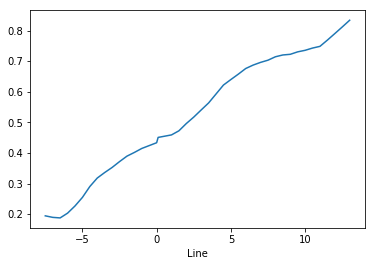

In [17]:
df_lines_performance.pct_smooth2.plot()


In [18]:
df_lines_performance

,len,sum,pct,pct_smooth,pct_smooth2,pct_smooth2_inv,abs_line,line,pct_smooth_avg
Line,,,,,,,,,
-13.0,1,0,0.000000,NaN,NaN,NaN,13.0,-13.0,NaN
-11.0,1,1,1.000000,NaN,NaN,NaN,11.0,-11.0,NaN
-10.5,5,2,0.400000,NaN,NaN,NaN,10.5,-10.5,NaN
-10.0,2,1,0.500000,NaN,NaN,NaN,10.0,-10.0,NaN
-9.5,6,0,0.000000,NaN,NaN,NaN,9.5,-9.5,NaN
-9.0,4,0,0.000000,0.237222,NaN,NaN,9.0,-9.0,NaN
-8.5,3,0,0.000000,0.251508,NaN,NaN,8.5,-8.5,NaN
-8.0,2,0,0.000000,0.189008,NaN,NaN,8.0,-8.0,NaN
-7.5,9,2,0.222222,0.174008,0.194405,0.805595,7.5,-7.5,0.5


In [19]:
df_lines_performance['sum'].sum() / df_lines_performance['len'].sum()

0.5598958333333334

In [20]:
df_lines_performance.drop([0])

,len,sum,pct,pct_smooth,pct_smooth2,pct_smooth2_inv,abs_line,line,pct_smooth_avg
Line,,,,,,,,,
-13.0,1,0,0.000000,NaN,NaN,NaN,13.0,-13.0,NaN
-11.0,1,1,1.000000,NaN,NaN,NaN,11.0,-11.0,NaN
-10.5,5,2,0.400000,NaN,NaN,NaN,10.5,-10.5,NaN
-10.0,2,1,0.500000,NaN,NaN,NaN,10.0,-10.0,NaN
-9.5,6,0,0.000000,NaN,NaN,NaN,9.5,-9.5,NaN
-9.0,4,0,0.000000,0.237222,NaN,NaN,9.0,-9.0,NaN
-8.5,3,0,0.000000,0.251508,NaN,NaN,8.5,-8.5,NaN
-8.0,2,0,0.000000,0.189008,NaN,NaN,8.0,-8.0,NaN
-7.5,9,2,0.222222,0.174008,0.194405,0.805595,7.5,-7.5,0.5


## test lookup file

In [21]:
ls

Meetup_NFLlines_Sep2014.pdf   nfl-season-standings.ipynb
__pycache__/                  nfl-survival-pool-test.ipynb
backtest_vs_elo_538.ipynb     nfl.ipynb
cuny2015_nfl_ml.pptx          nfl_alain.ipynb
external_data.py              nfl_alain_2015.ipynb
get-data-2016.ipynb           nfl_picks2.py
merge elo .ipynb              nflmerge.ipynb
mlnfl-nfl-graphlab.ipynb      nohup.out
mlnfl-nfl.ipynb               pydata2014_nfl_ml.pptx
mlnfl-nfl2.ipynb              readme.md
mlnfl-nfl2015-webinar.ipynb   run_nfl_picks.ipynb
mlnfl-nfl2015.ipynb           scrape-scores.ipynb
mlnfl-nfl2016-demo.ipynb      scrape-spreads.ipynb
mlnfl-nfl2018-demo.ipynb      spread to probability.ipynb
mlnfl-pydata.ipynb            webapp/
nfl/


In [22]:
from nfl import probability
df_lines_performance = probability.load_probability()

KeyError: 'MLNFL_ROOT'

In [ ]:
df_lines_performance

In [ ]:
week_filter = (df_recent.week == 15) & (df_recent.season == 2018)

df_picks = df_recent[week_filter].merge(df_lines_performance, left_on="Line", right_on='line', how='left')
df_picks

In [ ]:
use_cols = ['Home Team', 'Visitor', 'Line', 'pct_smooth','pct_smooth2', 'pct_smooth2_inv']
df_picks[use_cols].sort_values('pct_smooth2', ascending=False)